In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import csv
import datetime as dt
import re
import time
import dateutil

dataService = '/home/joe/data/datadog/by-service.csv'
dfService = pd.read_csv(dataService)


In [80]:
dfService.head(5)

,Service,API Gateway($),Elastic File System($),X-Ray($),SES($),SNS($),ElastiCache($),SimpleDB($),Tax($),Config($),...,WAF($),Redshift($),EC2 Container Registry (ECR)($),EC2-Instances($),SQS($),Budgets($),CloudSearch($),Athena($),EC2-Other($),Total cost ($)
0,Service Total,5.920412,0.919388,0.0,0.100271,14.449259,6588.672,0.000027,3601.57,1231.663,...,14.999997,7273.35,96.036537,2.748019e+06,110.568121,0,12528.303028,0.12901,671008.500167,4.655485e+06
1,Month 1,0.486613,0.919388,NaN,0.033560,6.732994,2220.096,0.000008,1284.13,338.221,...,5.000000,2449.35,50.565163,8.541583e+05,31.096825,0,4492.547501,0.12431,245472.554851,1.554169e+06
2,Month 2,0.517401,0.000000,NaN,0.034722,4.125028,2148.480,0.000012,1158.03,415.720,...,4.999997,2372.95,30.223630,8.840529e+05,30.754074,0,3953.060088,0.00470,213944.783614,1.492007e+06
3,Month 3,4.916398,0.000000,0.0,0.031989,3.591236,2220.096,0.000007,1159.41,477.722,...,5.000000,2451.05,15.247744,1.009808e+06,48.717223,0,4082.695439,NaN,211591.161702,1.609309e+06


In [81]:
dfService.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Service                          4 non-null      object 
 1   API Gateway($)                   4 non-null      float64
 2   Elastic File System($)           4 non-null      float64
 3   X-Ray($)                         2 non-null      float64
 4   SES($)                           4 non-null      float64
 5   SNS($)                           4 non-null      float64
 6   ElastiCache($)                   4 non-null      float64
 7   SimpleDB($)                      4 non-null      float64
 8   Tax($)                           4 non-null      float64
 9   Config($)                        4 non-null      float64
 10  Kinesis Firehose($)              4 non-null      float64
 11  WorkSpaces($)                    2 non-null      float64
 12  Route 53($)               

In [82]:
dataServiceTransposed = '/home/joe/data/datadog/by-service-transposed.csv'
dfSvcT = pd.read_csv(dataServiceTransposed).fillna(0)
dfSvcT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Service        37 non-null     object 
 1   Service Total  37 non-null     float64
 2   Month 1        37 non-null     float64
 3   Month 2        37 non-null     float64
 4   Month 3        37 non-null     float64
dtypes: float64(4), object(1)
memory usage: 1.6+ KB


In [83]:
dfSvcT['Service'] = dfSvcT['Service'].replace({'\$':''}, regex=True).astype(str)
dfSvcT['Service'] = dfSvcT['Service'].replace({'\(\)':''}, regex=True).astype(str)
dfSvcT = dfSvcT.sort_values('Service Total', ascending=False)

In [84]:
df = dfSvcT.set_index('Service').T.reset_index()
df = df.rename(columns={'index':'Months'})
regex = re.compile(r'Month\s+', flags=re.IGNORECASE)
df['Months'] = df['Months'].str.replace(regex,'')
df = df.drop([0])

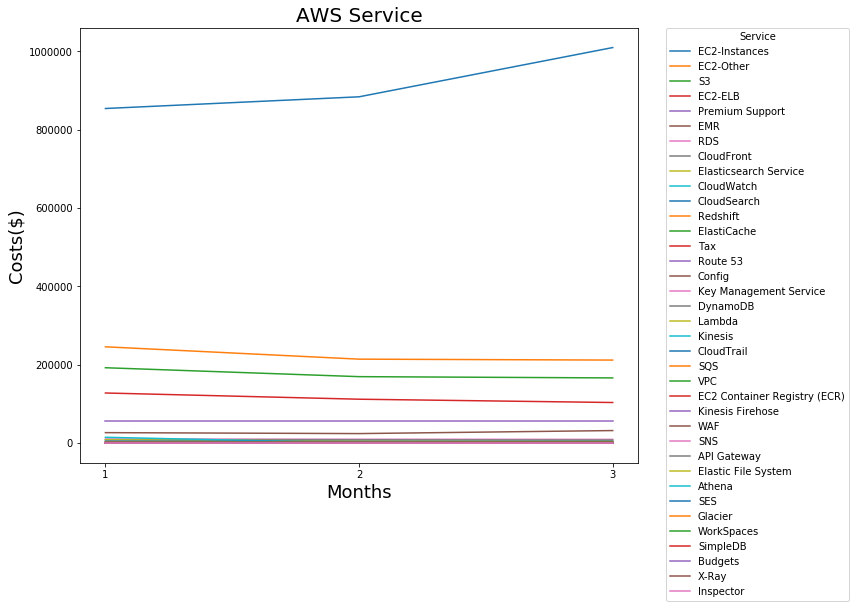

In [85]:
fig = plt.figure(figsize=(10,8))
ax=plt.gca()
ax.set_title("AWS Service", fontsize=20)
ax.set_ylabel("Costs($)", color='black', fontsize=18)
ax.set_xlabel("Months", color='black', fontsize=18)

cols = df.columns.values.tolist()
cols.pop(0)

colsList = []
colsLabels = []
for col in cols:
    df[col]= df[col].astype(float)
    plt.plot(df['Months'],df[col])
    colsList.append(df[col])
    colsLabels.append(col)

plt.legend(cols,title="Service",bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)
plt.show()

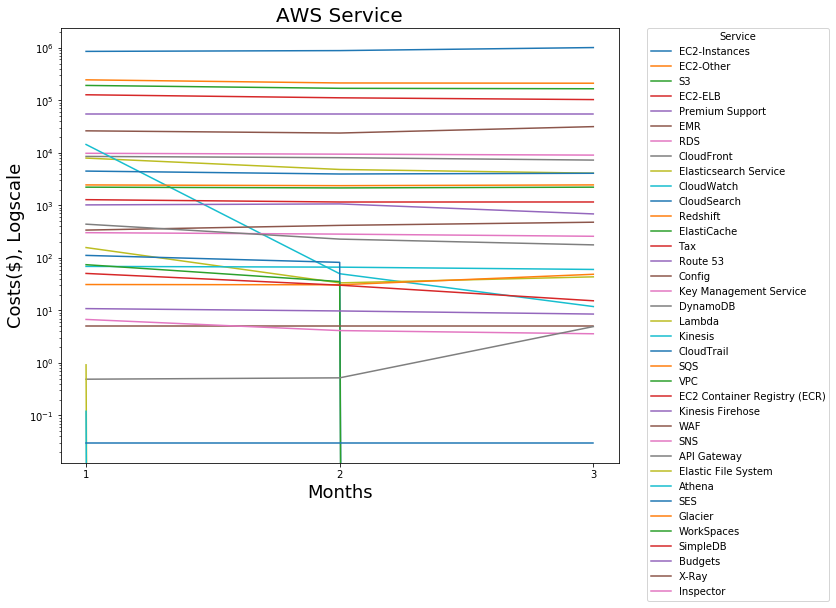

In [86]:
fig = plt.figure(figsize=(10,8))
ax=plt.gca()
ax.set_title("AWS Service", fontsize=20)
ax.set_ylabel("Costs($), Logscale", color='black', fontsize=18)
ax.set_xlabel("Months", color='black', fontsize=18)
ax.set_yscale('log')

for col in cols:
    plt.plot(df['Months'],df[col])

plt.legend(cols,title="Service",bbox_to_anchor=(1.05,1),loc='upper left', borderaxespad=0)
plt.show()

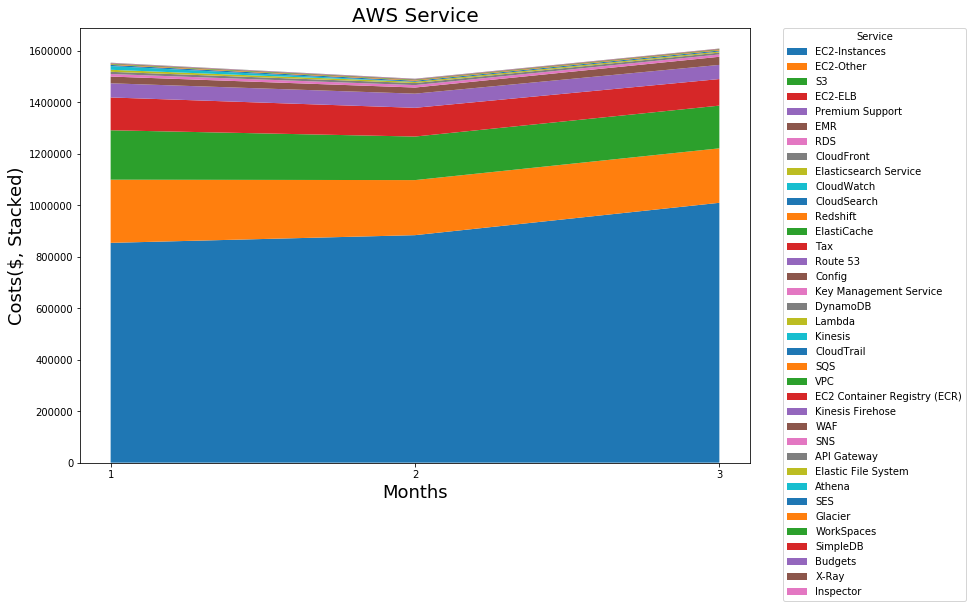

In [87]:
figArea = plt.figure(figsize=(12,8))
ax=plt.gca()
ax.set_title("AWS Service", fontsize=20)
ax.set_ylabel("Costs($, Stacked)", color='black', fontsize=18)
ax.set_xlabel("Months", color='black', fontsize=18)

plt.stackplot(df['Months'],colsList,labels=colsLabels)
plt.legend(loc='upper left',title='Service',bbox_to_anchor=(1.05,1),borderaxespad=0)